##  0.0. Objetivo do Problema:


-- 1.0. Previsao do primeiro destino que um novo usuário irá escolher.

-- Porque?
    -- Qual tipo de modelo de negócio do Airbnb? 
    
    
        - Marketplace ( Conectar pessoas que oferecem acomodacao, com pessoas que estao procurando acomodacao)
        - Oferta ( pessoas oferecendo acomodacao )
            - Tamanho do portfólio.
            - Diversidade/Densidade de Portfólio.
            - Preco Medio

        - Demanda ( pessoas procurando acomodacao )
            - Numero de Usuários
            - LTV ( Lifetime Value )
            - CAC ( Client Acquisition Cost )


           Gross Revenue = ( Fee * Numero cliente ) - CAC 

##  0.1. Proposta de solução:


--- Modelo de Predizao do primeiro destino de um novo usario.

- 1.0. Predicoes e salva em tabela do banco de dados. 
- 2.0. API 
        --- Input: usuario e suas caracteristicas
        --- Output: usuario e suas caracteristicas com a **predicao do destino**

--- 16 ciclos

# <font color ='red'> 1.0. Imports </font> 

In [58]:
import random
import pandas                               as pd
import seaborn                              as sns

from sklearn      import model_selection    as ms
from sklearn      import preprocessing      as pp
from sklearn      import metrics            as m

from scikitplot   import metrics            as mt

from keras        import models             as ml
from keras        import layers             as l

import warnings

warnings.filterwarnings("ignore")



## 1.1. Helper Function

## 1.2. Loading Data

In [2]:
df_raw = pd.read_csv('~/repositorio/airbnb_predict/data/raw/train_users_2.csv', low_memory=True)
df_sessions = pd.read_csv('~/repositorio/airbnb_predict/data/raw/sessions.csv', low_memory=True)

# 2.0. Data Description


In [87]:
df2 = df_raw.copy()

In [88]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of columns: {}'.format(df2.shape[1]))

Number of rows: 213451
Number of columns: 16


In [89]:
print('Number of rows: {}'.format(df_sessions.shape[0]))
print('Number of columns: {}'.format(df_sessions.shape[1]))

Number of rows: 10567737
Number of columns: 6


## 2.1. Data Type


In [96]:
df2.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [91]:
df_sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

## 2.2. NA Check


In [95]:
df2.isna().sum() / len(df2)

id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

In [99]:
df_sessions.isna().sum() / len(df_sessions)

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

In [105]:
# aux = df_sessions[df_sessions['secs_elapsed'] < 0.25e6]

<AxesSubplot:xlabel='secs_elapsed', ylabel='Density'>

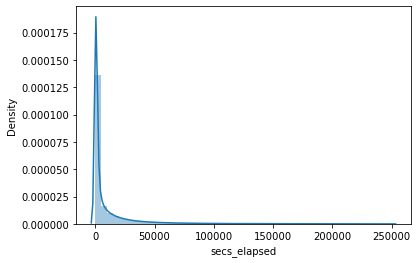

In [106]:
# sns.distplot(aux['secs_elapsed'])

<AxesSubplot:xlabel='age', ylabel='Density'>

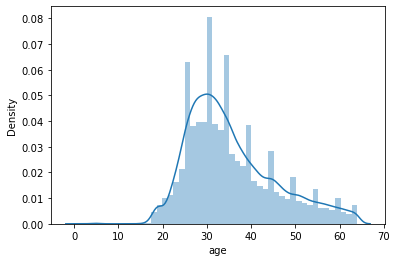

In [62]:
# sns.distplot(df2[df2['age'] < 65] ['age'])

In [98]:
# remove missing value completly

# df2 = df2.dropna()

# ==================== User ======================
# date_first_booking
date_first_booking_max = pd.to_datetime(df2['date_first_booking']).max().strftime('%Y%m%d')
df2['date_first_booking'] = df2['date_first_booking'].fillna(date_first_booking_max)
                                
# age
avg_age = df2['age'].mean()   
df2['age'] = df2['age'].fillna(avg_age)

# first_affiliate_tracked
df2 = df2[~df2['first_affiliate_tracked'].isna()]     

# ==================== Sessions ======================
# user_id          0.003 %
df_sessions = df_sessions[~df_sessions['user_id'].isna()]     

# action           0.007 %
df_sessions = df_sessions[~df_sessions['action'].isna()]     

# action_type      0.106 %
df_sessions = df_sessions[~df_sessions['action_type'].isna()]     

# action_detail    0.106 %
df_sessions = df_sessions[~df_sessions['action_detail'].isna()]     

# device_type      0.000 %
df_sessions = df_sessions[~df_sessions['device_type'].isna()]     

# secs_elapsed     0.012 %
df_sessions = df_sessions[~df_sessions['secs_elapsed'].isna()]     


                                

## 2.3. Change Data Type


In [94]:
# 'date_account_created'
df2['date_account_created'] = pd.to_datetime(df2['date_account_created'])

# 'timestamp_first_active'
df2['timestamp_first_active'] = pd.to_datetime(df2['timestamp_first_active'], format = '%Y%m%d%H%M%S')

# 'date_first_booking'
df2['date_first_booking'] = pd.to_datetime(df2['date_first_booking'])

# 'age'
df2['age'] = df2['age'].astype('int64')


## 2.4. Check Balanced Data


In [9]:
df2['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 3.0.  Data Filtering


In [10]:
df3 = df2.copy()

## 3.1.  Filtering Rows


## 3.2.  Columns Selection

# 4.0.  Data Preparation


In [11]:
df4 = df3.copy()

In [12]:
# dummy variable
df4_dummy = pd.get_dummies(df4.drop(['id','country_destination'], axis =1))

# join id and country destination
df4 = pd.concat([df4[['id','country_destination']],df4_dummy], axis =1)

# 5.0. Feature Selection


In [13]:
df5 = df4.copy()

In [14]:
cols_drop = ['date_account_created','timestamp_first_active','date_first_booking'] # original dates

In [15]:
df5 = df5.drop(cols_drop, axis =1)

In [16]:
X = df5.drop(['id','country_destination'], axis = 1)
Y = df5['country_destination'].copy()

In [17]:
# Split dataset into training and test

X_train, X_test , y_train, y_test = ms.train_test_split(X, Y, test_size = 0.2 , random_state=32)

# 6.0. Machine Learning Model


In [18]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

## 6.1. Baseline Model


In [19]:
country_destination_list = df5['country_destination'].drop_duplicates().sort_values().to_list()
k_num = y_test.shape[0]
country_destination_weights = df5['country_destination'].value_counts(normalize= True).sort_index().to_list()

# modelo aleatorio
yhat_random = random.choices (population = country_destination_list , 
                              weights = country_destination_weights,
                              k = k_num )

### 6.1.1 Performance


Accuracy: 0.5157315731573158
Balanced Accuracy: 0.09273356327148381
Kappa Score: 0.0008087029973429249


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

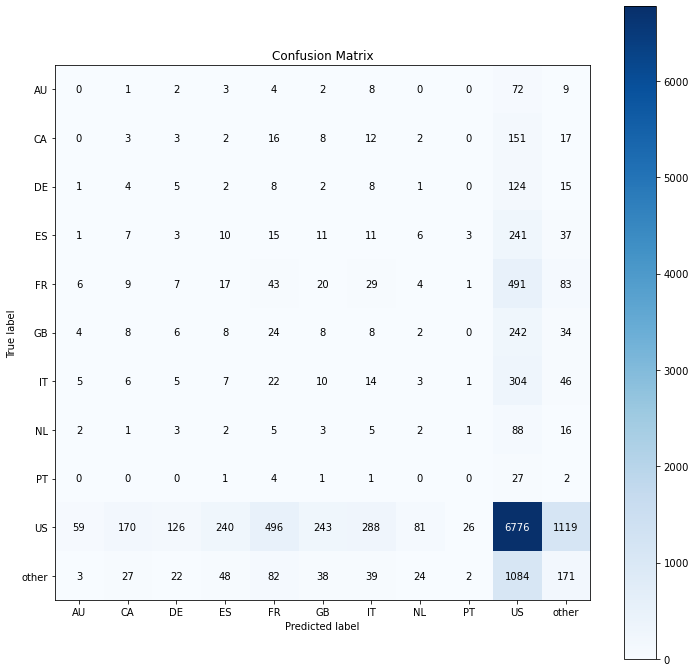

In [20]:
# accuracy
acc_random = m.accuracy_score(y_test, yhat_random)
print('Accuracy: {}'.format(acc_random))

# Balanced Accuracy
balanced_acc_random = m.balanced_accuracy_score(y_test, yhat_random)
print('Balanced Accuracy: {}'.format(balanced_acc_random))

# Kappa Metrics
kappa_acc_random = m.cohen_kappa_score(y_test, yhat_random)
print('Kappa Score: {}'.format(kappa_acc_random))

# confusion matrix
mt.plot_confusion_matrix(y_test , yhat_random, normalize=False, figsize=(12,12))

## 6.2. Neural Network - MLP

In [21]:
# model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim = X_train.shape[1], activation= 'relu'))
model.add(l.Dense(11,  activation= 'softmax'))

# model compile
model.compile(loss = 'categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

# tain model
model.fit(X_train, y_train_nn, epochs=100)

2022-03-03 13:34:54.446273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-03 13:34:54.446616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 13:34:54.446873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-03 13:34:54.446994: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-03 13:34:54.447087: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

Epoch 1/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.3303 - accuracy: 0.7033
Epoch 2/100
1705/1705 [==============================] - 5s 3ms/step - loss: 1.2537 - accuracy: 0.7077
Epoch 3/100
1705/1705 [==============================] - 5s 3ms/step - loss: 1.2145 - accuracy: 0.7085
Epoch 4/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1930 - accuracy: 0.7085
Epoch 5/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1762 - accuracy: 0.7084
Epoch 6/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1628 - accuracy: 0.7087
Epoch 7/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1558 - accuracy: 0.7087
Epoch 8/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1463 - accuracy: 0.7089
Epoch 9/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1382 - accuracy: 0.7089
Epoch 10/100
1705/1705 [==============================] - 3s 2ms/step - l

1705/1705 [==============================] - 3s 1ms/step - loss: 1.1010 - accuracy: 0.7113
Epoch 80/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1009 - accuracy: 0.7113
Epoch 81/100
1705/1705 [==============================] - 3s 1ms/step - loss: 1.1001 - accuracy: 0.7115
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1004 - accuracy: 0.7117
Epoch 83/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1001 - accuracy: 0.7116
Epoch 84/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0998 - accuracy: 0.7115
Epoch 85/100
1705/1705 [==============================] - 3s 1ms/step - loss: 1.0997 - accuracy: 0.7114
Epoch 86/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0994 - accuracy: 0.7115
Epoch 87/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0992 - accuracy: 0.7115
Epoch 88/100
1705/1705 [==============================] - 2s 1ms/step - loss:

### 6.2.1 NN Performance


In [22]:
# prediction
pred_nn = model.predict(X_test)

# invert Predict
yhat_nn = ohe.inverse_transform(pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1,-1)[0]

Accuracy: 0.7028236156949028
Balanced Accuracy: 0.09139421540137666
Kappa Score: 0.001513479400496287


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

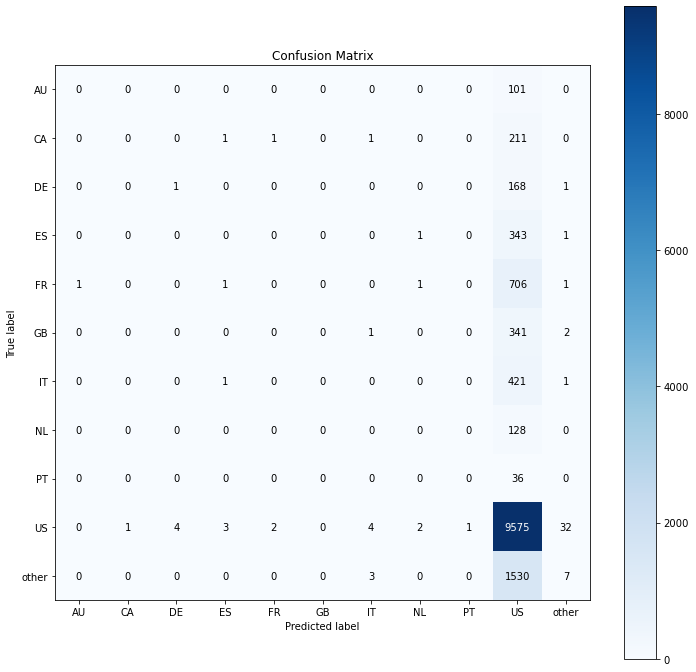

In [23]:
# accuracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

# Balanced Accuracy
balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
print('Balanced Accuracy: {}'.format(balanced_acc_nn))

# Kappa Metrics
kappa_acc_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
print('Kappa Score: {}'.format(kappa_acc_nn))

# confusion matrix
mt.plot_confusion_matrix(y_test_nn , yhat_nn, normalize=False, figsize=(12,12))

### 6.2.2 NN Performance - Cross Validation


In [25]:
# gerate k-fold

num_fold = 5
kfold = ms.StratifiedKFold ( n_splits = num_fold , shuffle = True, random_state = 32 )

balanced_acc_list = []
kappa_acc_nn_list = []

i = 1
for train_ix , val_ix in kfold.split (X_train, y_train):
    print(' Fold Number : {}/{}'.format(i, num_fold))
    # get fold
    x_train_fold = X_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = X_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # target hot-encoging
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform(y_train_fold.values.reshape(-1,1)).toarray()
     
    # model definition
    model = ml.Sequential()
    model.add(l.Dense(256 , input_dim =X_train.shape[1] , activation = 'relu' ))
    model.add(l.Dense(11 , activation = 'softmax' ))

    # compile model
    model.compile ( loss = 'categorical_crossentropy', optimizer = 'adam' , metrics=['accuracy'])

    # training model
    model.fit( x_train_fold , y_train_fold_nn, epochs = 100, batch_size = 32, verbose = 0)
    
    # prediction
    pred_nn = model.predict(x_val_fold)

    # invert Predict
    yhat_nn = ohe.inverse_transform(pred_nn)

    #  prepare data
    y_test_nn =y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape(1,-1)[0]    
    
    # metrics
    # Balanced Accuracy
    balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
    balanced_acc_list.append(balanced_acc_nn)
    
    # Kappa Metrics
    kappa_acc_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
    kappa_acc_nn_list.append(kappa_acc_nn)

    i +=  1

 Fold Number : 1/5
 Fold Number : 2/5
 Fold Number : 3/5
 Fold Number : 4/5
 Fold Number : 5/5


In [111]:
print ("Avg Balanced Acurracy : {} +/- {}".format(np.round(np.mean(balanced_acc_list),2), 
                                                  np.round(np.std(balanced_acc_list),4 )))

print ("Avg Kappa Score : {} +/- {}".format(np.round(np.mean(kappa_acc_nn_list),3), 
                                            np.round(np.std(kappa_acc_nn_list),4 )))

Avg Balanced Acurracy : 0.09 +/- 0.0003
Avg Kappa Score : 0.004 +/- 0.0011
